In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import pdist, squareform

This notebook contains the code for generating the calculations and graphs for the tutorial "INSERT NAME." There are many points where code is repeated in this notebook so as to establish a linear progression with the tutorial that at least in relative terms, will be easier to follow for a beginner than a notebook that is more object-oriented.

In [2]:
plt.style.use('ggplot')


plt.rc('font', size=20)
plt.rcParams["figure.autolayout"] = True

In [3]:
spirits = [['El Buho Espadin', 3, 0.5],
            ['Casamigos Reposado', 1, 1],
            ['Espolon Anejo',1.5, 2], 
            ['Laphroaig 12', 7, 4],
            ['Macallan 12', 5, 4],
            ['Knob Creek Bourbon', 4, 5]]

spirits_df = pd.DataFrame(spirits, columns=['spirit','smokiness', 'color' ])

spirits_df.head(10)

,spirit,smokiness,color
0,El Buho Espadin,3.0,0.5
1,Casamigos Reposado,1.0,1.0
2,Espolon Anejo,1.5,2.0
3,Laphroaig 12,7.0,4.0
4,Macallan 12,5.0,4.0
5,Knob Creek Bourbon,4.0,5.0


In [5]:
spirits_df.to_csv('spirits_1.csv', index=False)

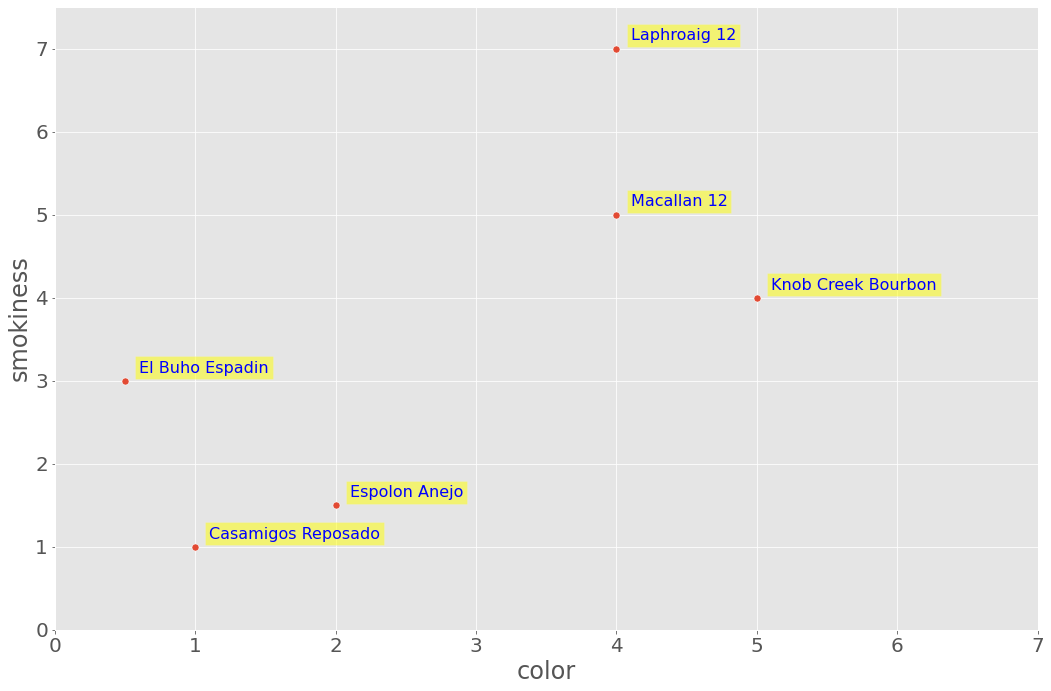

In [7]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=spirits_df['smokiness'], x=spirits_df['color'], s=50)
plt.xlim([0, 7])
plt.ylim([0,7.5])


#sns.scatterplot(data=df,x=’G’,y=’GA’)

for i in range(spirits_df.shape[0]):
    plt.text(x=spirits_df['color'][i]+.1,
             y=spirits_df['smokiness'][i]+.1, 
             s=spirits_df['spirit'][i], 
             fontdict=dict(color='blue',size=16),
             bbox=dict(facecolor='yellow',alpha=0.5))

#plt.show()
plt.savefig('./plots/all-spirits.png')

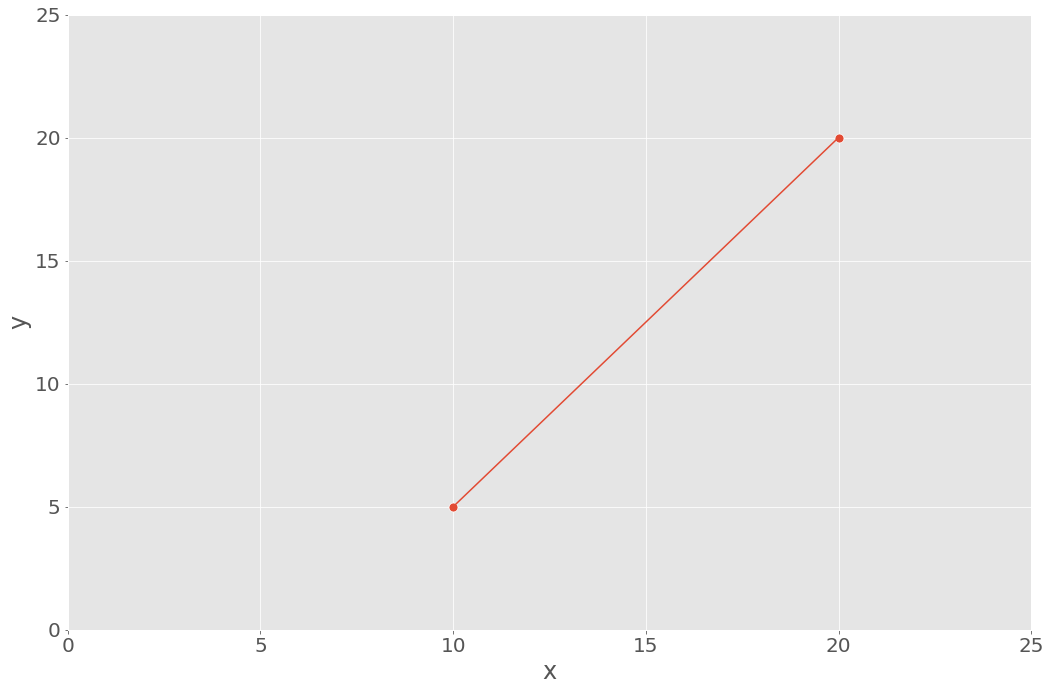

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


sns.lineplot(y=y,
                x=x)

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./plots/1-points.png')

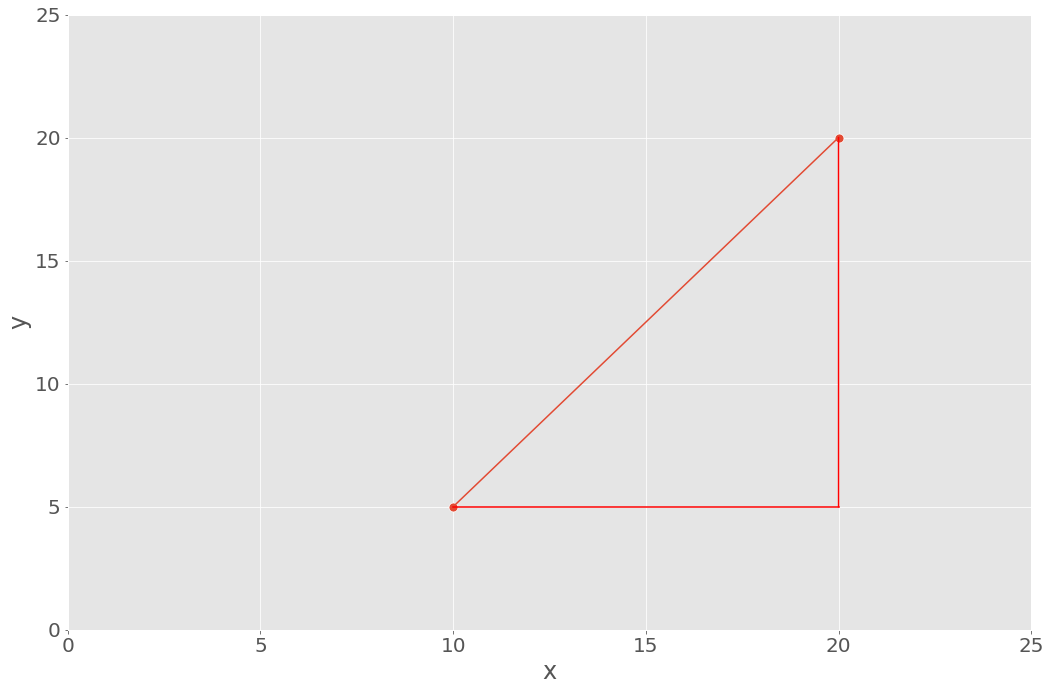

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


sns.lineplot(y=y,
                x=x)

sns.lineplot(y=[y[0], y[0]],
                x=[x[0],x[1]], color='red')

#note, adding .001 to the x value below is a hack to get around some weird
#plotting thing with vertical lines where they don't really show up
sns.lineplot(y=[y[0],y[1]],
                x=[x[1]+.001,x[1]], color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./plots/2-triange.png')

In [11]:
#f"Hello, {name}. You are {age}."
print(f"The distance between the two points is: {round(math.dist([x[0], y[0]], [x[1], y[1]]), 2)}")

The distance between the two points is: 18.03


In [16]:
print("Here is the way you would calculate the same value without using the math library: (10**2 + 15**2)**0.5")
print(f"I'll prove to you the answer is the same:")
print(f"(10**2 + 15**2)**0.5 = {round((10**2 + 15**2)**0.5, 2)}")

Here is the way you would calculate the same value without using the math library: (10**2 + 15**2)**0.5
I'll prove to you the answer is the same:
(10**2 + 15**2)**0.5 = 18.03


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


# sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
#                 x=[spirits_df['color'][0],spirits_df['color'][3]] )

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./plots/1-points.png')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]] , s=50)
plt.xlim([0, 7])
plt.ylim([0,7.5])

plt.text(x=spirits_df['color'][0]+.1,
         y=spirits_df['smokiness'][0]+.1, 
         s=spirits_df['spirit'][0], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

plt.text(x=spirits_df['color'][3]+.1,
         y=spirits_df['smokiness'][3]+.1, 
         s=spirits_df['spirit'][3], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]] )

plt.xlabel('color')
plt.ylabel('smokiness')

plt.savefig('./plots/laphroaig-elbuho-points.png')


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3], spirits_df['smokiness'][0]],
                x=[spirits_df['color'][0],spirits_df['color'][3], spirits_df['color'][3]] , s=50)

plt.xlim([0, 7])
plt.ylim([0,7.5])

plt.text(x=spirits_df['color'][0]+.1,
         y=spirits_df['smokiness'][0]+.1, 
         s=spirits_df['spirit'][0], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

plt.text(x=spirits_df['color'][3]+.1,
         y=spirits_df['smokiness'][3]+.1, 
         s=spirits_df['spirit'][3], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.9))

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]], color='red' )

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][0]],
                x=[spirits_df['color'][0],spirits_df['color'][3]], color='red')

#note, adding .001 to the x value below is a hack to get around some weird
#plotting thing with vertical lines where they don't really show up
sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][3]+.001,spirits_df['color'][3]], color='red')

plt.xlabel('color')
plt.ylabel('smokiness')
plt.savefig('./plots/laphroaig-elbuho-triangle.png')

In [21]:
print(f"The distance between El Buho and Laphroaig is: {math.dist([spirits_df['smokiness'][0],spirits_df['color'][0]], [spirits_df['smokiness'][3],spirits_df['color'][3]])}")

The distance between El Buho and Laphroaig is: 5.315072906367325


In [22]:
unknown_spirit = {'spirit':'Unknown', 'smokiness':2, 'color':3}
unknown_spirit = pd.DataFrame([unknown_spirit])
                  
spirits_df_us = pd.concat([spirits_df, unknown_spirit], ignore_index=True)

spirits_df_us.head(10)

,spirit,smokiness,color
0,El Buho Espadin,3.0,0.5
1,Casamigos Reposado,1.0,1.0
2,Espolon Anejo,1.5,2.0
3,Laphroaig 12,7.0,4.0
4,Macallan 12,5.0,4.0
5,Knob Creek Bourbon,4.0,5.0
6,Unknown,2.0,3.0


In [24]:
distances = pdist(spirits_df_us[['smokiness', 'color']].values, metric='euclidean')
dist_matrix = squareform(distances)

us_dist = pd.DataFrame(dist_matrix.round(2),
    columns = spirits_df_us.spirit.values,
    index = spirits_df_us.spirit.values
)[['Unknown']]

us_dist.sort_values('Unknown').head(10)

,Unknown
Unknown,0.00
Espolon Anejo,1.12
Casamigos Reposado,2.24
El Buho Espadin,2.69
Knob Creek Bourbon,2.83
Macallan 12,3.16
Laphroaig 12,5.10


In [26]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 10)
# sns.scatterplot(y=spirits_df['smokiness'], x=spirits_df['color'], s=50)
# plt.xlim([0, 7])
# plt.ylim([0,7.5])


# for i in range(spirits_df.shape[0]):
#     plt.text(x=spirits_df['color'][i]+.1,
#              y=spirits_df['smokiness'][i]+.1, 
#              s=spirits_df['spirit'][i], 
#              fontdict=dict(color='blue',size=16),
#              bbox=dict(facecolor='yellow',alpha=0.5))

# plt.show()
# plt.savefig('./plots/all-spirits-unknown.png')

In [29]:
unknown_spirit2 = {'spirit':'Unknown', 'smokiness':2.5, 'color':3}
unknown_spirit2 = pd.DataFrame([unknown_spirit2])
                  
spirits_df_us2 = pd.concat([spirits_df, unknown_spirit2], ignore_index=True)

distances2 = pdist(spirits_df_us2[['smokiness', 'color']].values, metric='euclidean')
dist_matrix2 = squareform(distances2)

us_dist2 = pd.DataFrame(dist_matrix2.round(2),
    columns = spirits_df_us2.spirit.values,
    index = spirits_df_us2.spirit.values
)[['Unknown']]

us_dist2.sort_values('Unknown').head(10)

,Unknown
Unknown,0.00
Espolon Anejo,1.41
Casamigos Reposado,2.50
Knob Creek Bourbon,2.50
El Buho Espadin,2.55
Macallan 12,2.69
Laphroaig 12,4.61


In [30]:
us_dist2.to_csv('distances_modified.csv')

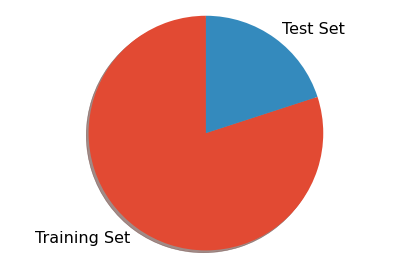

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rc('font', size=16)
labels = 'Training Set', 'Test Set'
sizes = [80, 20]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig('./plots/train-test.png')